In [89]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue May 15 21:42:14 2018

@author: rodrigoazs
"""

import numpy as np
import random
import math
import matplotlib.pyplot as plt

plots = []
for i in range(16):
    plots.append(int(10**i))
    plots.append(int(1/4 * 10**i))
    plots.append(int(2/4 * 10**i))
    plots.append(int(3/4 * 10**i))

In [88]:
#def tree(h):
h = 9
n = np.array([2**i for i in range(h+1)]).sum()

edges = n - 1        
pi_stacionary = ([3.0] * n) / (2*edges)

n_only_1_edge = 2**h - 1
pi_stacionary[0] = 2.0 / (2*edges)

for i in range(n_only_1_edge, len(pi_stacionary)):
    pi_stacionary[i] = 1.0 / (2*edges)

P = np.zeros((n, n))
for i in range(n):
    P[i][i] = 0.5
    left = 2*i + 1
    right = 2*i + 2
    parent = math.floor((i-1)/2)
    transitions = []
    if left < n:
        transitions.append(left)
        transitions.append(right)
    if parent >= 0:
        transitions.append(parent)
    for t in transitions:
        P[i][t] = 0.5 / len(transitions)

P = np.matrix(P)

pi_estimate = [0] * n

X_arvore = []
y_arvore = []
pi_0 = 0
pi_estimate[0] = 1

pi_estimate = np.matrix(pi_estimate)
for i in range(50000):
    pi_estimate = pi_estimate * P
    if (i+2) in plots:
        variancia = (abs(pi_estimate - pi_stacionary)).sum()/2
        X_arvore.append(i+2)
        y_arvore.append(variancia)

plt.loglog(X_arvore, y_arvore, label='Árvore binária cheia')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [106]:
n = 1000

edges = n       
pi_stacionary = np.matrix(([2] * n)) / (2*edges)

P = np.zeros((n, n))
for i in range(n):
    P[i][i] = 0.5
    left = (i - 1) % n
    right = (i + 1) % n
    transitions = []
    transitions.append(left)
    transitions.append(right)
    for t in transitions:
        P[i][t] = 0.5 / len(transitions)

P = np.matrix(P)

pi_estimate = [0.0] * n

X_anel = []
y_anel = []
pi_estimate[0] = 1.0

pi_estimate = np.matrix(pi_estimate)
for i in range(5000000):
    pi_estimate = pi_estimate * P
    if (i+2) in plots:
        variancia = (abs(pi_estimate - pi_stacionary)).sum()/2
        X_anel.append(i+2)
        y_anel.append(variancia)

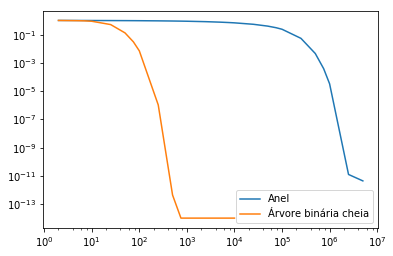

In [107]:
plt.loglog(X_anel, y_anel, label='Anel')
plt.loglog(X_arvore, y_arvore, label='Árvore binária cheia')
plt.legend()
plt.show()

In [74]:
g = 32
n = g**2
   
edges = 2 * g * (g-1)      
pi_stacionary = [0.0] * n #np.matrix(([4] * n)) / (2*edges)
P = np.zeros((n, n))

for i in range(n):
    transitions = []
    left = i - 1
    right = i + 1
    up = i - g
    down = i + g
    if left >= 0 and left < n:
        transitions.append(left)
    if right >= 0 and right < n:
        transitions.append(right)
    if up >= 0 and up < n:
        transitions.append(up)
    if down >= 0 and down < n:
        transitions.append(down)
    pi_stacionary[i] = len(transitions)
    P[i][i] = 0.5
    for t in transitions:
        P[i][t] = 0.5 / len(transitions)
        
pi_stacionary = np.matrix(pi_stacionary) / (2*edges)

P = np.matrix(P)

pi_estimate = [0.0] * n

X_grid = []
y_grid = []
pi_estimate[0] = 1.0

pi_estimate = np.matrix(pi_estimate)
for i in range(100000):
    pi_estimate = pi_estimate * P
    if (i+2) in plots:
        variancia = (abs(pi_estimate - pi_stacionary)).sum()/2
        X_grid.append(i+2)
        y_grid.append(variancia)

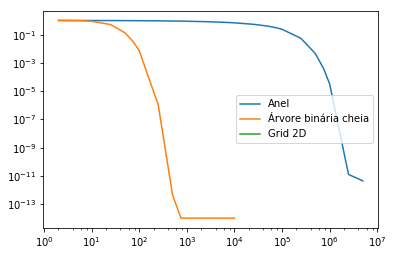

In [108]:
plt.loglog(X_anel, y_anel, label='Anel')
plt.loglog(X_arvore, y_arvore, label='Árvore binária cheia')
plt.loglog(X_grid, y_grid, label='Grid 2D')
plt.legend()
plt.show()

In [63]:
y_grid

[1.0055443548387095,
 0.98943107358870963,
 0.97987037070256766,
 0.96758915830781556,
 0.91516904278826039,
 0.84444250602166759,
 0.78439909181988821,
 0.73117516032260343,
 0.51492896141561639,
 0.35127291412863637,
 0.25370146266869475,
 0.18539484447656449,
 0.029036850893468458,
 0.0078125000000036759,
 0.007812500000005872,
 0.0078125000000081584,
 0.0078125000000202529,
 0.0078125000000218124,
 0.0078125000000218124,
 0.0078125000000218124,
 0.0078125000000218124,
 0.0078125000000218124]

In [64]:
pi_estimate

matrix([[ 0.00049628,  0.00074442,  0.00074442, ...,  0.00074442,
          0.00074442,  0.00049628]])

In [66]:
pi_estimate.shape

(1, 1024)

In [95]:
pi_stacionary

matrix([[ 0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,  0.001,
          0.001,  0.001,  0.001,  0.001,  0.001,  0

In [104]:
pi_estimate

matrix([[ 0.00100074,  0.00100074,  0.00100074,  0.00100074,  0.00100074,
          0.00100074,  0.00100074,  0.00100074,  0.00100074,  0.00100074,
          0.00100074,  0.00100074,  0.00100074,  0.00100074,  0.00100074,
          0.00100074,  0.00100074,  0.00100074,  0.00100074,  0.00100074,
          0.00100074,  0.00100074,  0.00100074,  0.00100074,  0.00100074,
          0.00100074,  0.00100073,  0.00100073,  0.00100073,  0.00100073,
          0.00100073,  0.00100073,  0.00100073,  0.00100073,  0.00100073,
          0.00100073,  0.00100073,  0.00100072,  0.00100072,  0.00100072,
          0.00100072,  0.00100072,  0.00100072,  0.00100072,  0.00100072,
          0.00100072,  0.00100071,  0.00100071,  0.00100071,  0.00100071,
          0.00100071,  0.00100071,  0.00100071,  0.0010007 ,  0.0010007 ,
          0.0010007 ,  0.0010007 ,  0.0010007 ,  0.0010007 ,  0.00100069,
          0.00100069,  0.00100069,  0.00100069,  0.00100069,  0.00100069,
          0.00100068,  0.00100068,  0.

In [83]:
P.shape

(1000, 1000)

In [103]:
y_anel

[0.99700000000000033,
 0.99100000000000033,
 0.98851171875000032,
 0.98568774414062532,
 0.97691189266600387,
 0.96781132149519622,
 0.96113541878285402,
 0.95555592374312315,
 0.93286743832415553,
 0.90868855222576883,
 0.89091990135990873,
 0.87634618180953794,
 0.81666442102428638,
 0.75466946174471783,
 0.71004104190344119,
 0.67408658054297288,
 0.53264255608092259,
 0.3961044072777436,
 0.30518034452869491,
 0.23756297908784257,
 0.23755825563641964,
 0.23755117063831357,
 0.23754644742559219,
 0.23753936278552923,
 0.23750394280733494,
 0.2374449214423493,
 0.23738591498901673,
 0.23732692344346915,
 0.23697328701715129,
 0.23638508302013517,
 0.23579836323862538,
 0.23521339496512533,
 0.23173599579363763,
 0.22605571997243568,
 0.2205201502701058,
 0.21512228221285595,
 0.1854463084053089,
 0.1448654244986981,
 0.11318377927114075,
 0.088434609288922356,
 0.088432863630609926,
 0.088430245207755442,
 0.088428499635594238,
 0.0884258813419634,
 0.088412791036730068,
 0.08839097

In [105]:
for i in range(500000):
    pi_estimate = pi_estimate * P
    if (i+2) in plots:
        variancia = (abs(pi_estimate - pi_stacionary)).sum()/2
        X_anel.append(i+2)
        y_anel.append(variancia)

KeyboardInterrupt: 